In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Path to your test dataset (structured similar to training: one folder per class)
test_dataset_path = "brain_tumor_dataset"  # Update this path as needed

# Create an ImageDataGenerator for the test set (only rescaling is needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator; make sure it matches the target size used during training
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important for accurate evaluation metrics
)

# Load the saved model
model = load_model("brain_tumor_vgg19_classifier.h5")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 1311 images belonging to 4 classes.
82/82 [==============================] - 41s 358ms/step - loss: 0.1831 - categorical_accuracy: 0.9474
Test Accuracy: 94.74%


Found 1311 images belonging to 4 classes.
82/82 [==============================] - 21s 251ms/step
Confusion Matrix:
[[283   8   1   8]
 [  2 270  10  24]
 [  5   5 390   5]
 [  0   1   0 299]]

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.94      0.96       300
meningioma_tumor       0.95      0.88      0.92       306
          normal       0.97      0.96      0.97       405
 pituitary_tumor       0.89      1.00      0.94       300

        accuracy                           0.95      1311
       macro avg       0.95      0.95      0.95      1311
    weighted avg       0.95      0.95      0.95      1311



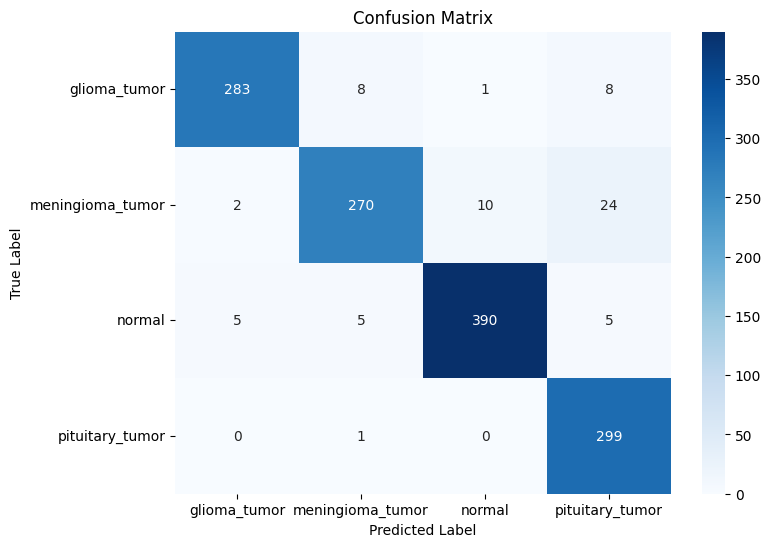

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Path to your test dataset (structured similar to training: one folder per class)
test_dataset_path = "brain_tumor_dataset"  # Update brain_tumor_datasetthis path as needed

# Create an ImageDataGenerator for the test set (only rescaling is needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator; ensure target_size matches training (224x224)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important to maintain the order for evaluation
)

# Load the trained model
model = load_model("brain_tumor_vgg19_classifier.h5")

# Predict on the test set
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Get class labels (alphabetical order as per directory names)
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
